ESS with 201812 bloom timing

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [2]:
directory = 'ESS_2018'

In [3]:
def get_the_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
#    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_{year}04*ptrc_T*.nc'
#    for filename in sorted(glob.glob(thestring)):
#        print (filename)
#        data = xr.open_dataset(filename)
#        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
#                             x = places.PLACES['S3']['NEMO grid ji'][1] )
#        evenlessink.append(data_extract)
#        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [4]:
timeseries2015 = get_the_data('2015')

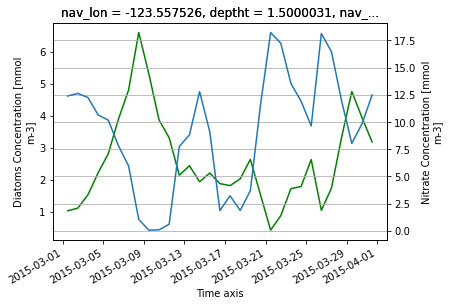

In [8]:
fig, ax = plt.subplots(1, 1)
timeseries2015.diatoms.plot(ax=ax, color='g')
ax2 = ax.twinx()
timeseries2015.nitrate.plot(ax=ax2);
ax2.grid()